## **은행 고객 이탈 여부 데이터**
> **Surname** 레이블로 인코딩된 고객의 성씨  
> **CreditScore** 고객의 신용점수  
> **Geography** 국가  
> **Gender** 성별  
> **Age** 나이  
> **Tenure** 은행을 사용한 연도  
> **Balance** 고객의 계좌 잔액  
> **NumOfProducts** 고객이 사용한 은행 상품 수  
> **HasCrCard** 고객의 신용보유 여부 카드 (1=True, 0=False)  
> **IsActiveMember** 고객이 활성 회원인지 여부  
> **EstimatedSalary** 고객의 예상 급여   

> **Exited** 고객이 이탈했는지 여부 (1=True, 0=False)

In [1]:
import pandas as pd

# 데이터 불러오기
b_df = pd.read_csv('./datasets/bank.csv')
b_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [2]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [3]:
# 결측치 확인
b_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# 중복행 확인
b_df.duplicated().sum()

0

In [5]:
# 중복행 확인
b_df.duplicated().sum()

0

In [6]:
pre_b_df = b_df.copy()

In [7]:
# 불필요한 넘버 컬럼 삭제
pre_b_df = pre_b_df.drop(labels=['id', 'CustomerId'], axis=1).reset_index(drop=True)
pre_b_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
# 타겟 데이터 설정하기
pre_b_df['target'] = pre_b_df['Exited']
pre_b_df = pre_b_df.drop(labels=['Exited'], axis=1)

In [9]:
# 타겟 데이터 비중 동일하게 조정 (언더샘플링)
zero = pre_b_df[pre_b_df.target == 0].sample(34921, random_state=124)
one = pre_b_df[pre_b_df.target == 1]

pre_b_df = pd.concat([zero, one])
pre_b_df.reset_index(drop=True, inplace=True)

In [10]:
# 확인하기
pre_b_df['target'].value_counts()

target
0    34921
1    34921
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# 문자열 컬럼 추출
columns = ['Surname', 'Geography', 'Gender']
label_encoders = {}

# 컬럼 반복하여 column에 담아 적용:
for column in columns:
    # LabelEncoder 객체 생성, 문자열 데이터 인코딩을 통해 정수로 형변환 후 데이터 교체
    encoder = LabelEncoder()
    # LabelEncoder를 사용하여 각 컬럼의 값을 변환
    result = encoder.fit_transform(pre_b_df[column])
    # 변환된 값의 클래스(고유한 값) 저장
    label_encoders[column] = encoder.classes_
    # 변환된 값 적용
    pre_b_df[column] = result

# 교유한 값 확인
label_encoders

{'Surname': array(['Abbie', 'Abbott', 'Abdullah', ..., 'Zuev', 'Zuyev', 'Zuyeva'],
       dtype=object),
 'Geography': array(['France', 'Germany', 'Spain'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object)}

array([[<Axes: title={'center': 'Surname'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Geography'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

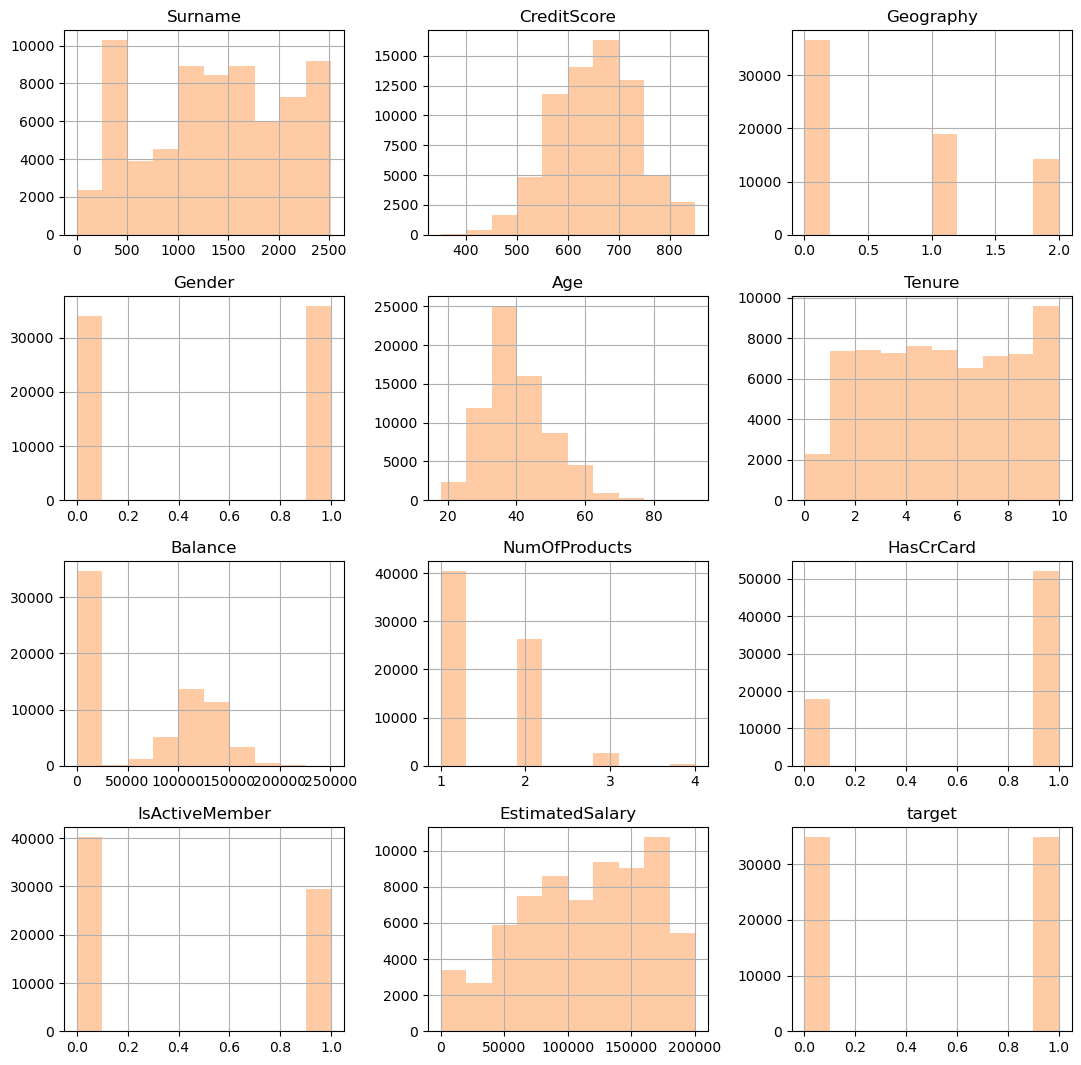

In [12]:
# 히스토그램 그려보기
pre_b_df.hist(figsize=(13,13), color='#FFCBA4')

In [13]:
# 상관관계 확인
pre_b_df.corr()['target'].sort_values(ascending=False)[1:]

Age                0.390196
Balance            0.156778
Geography          0.068395
EstimatedSalary    0.022959
Tenure            -0.020800
HasCrCard         -0.022446
CreditScore       -0.031726
Surname           -0.035161
Gender            -0.179907
NumOfProducts     -0.239309
IsActiveMember    -0.259414
Name: target, dtype: float64

<Axes: >

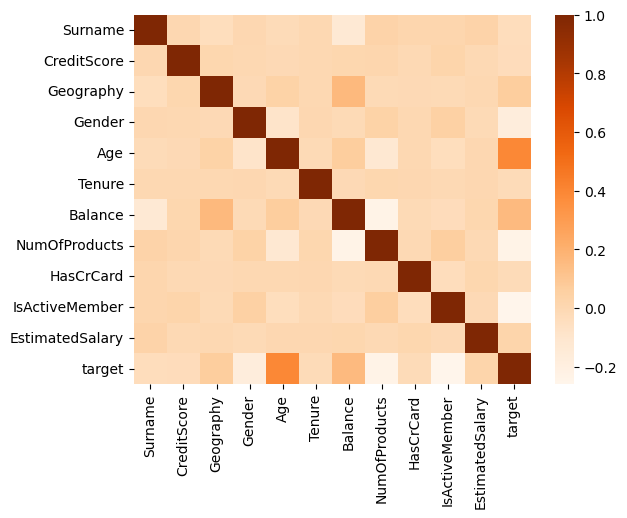

In [14]:
import seaborn as sns

# 히트맵을 통해 상관관계 확인
sns.heatmap(pre_b_df.corr(), cmap='Oranges')

In [15]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[4780 2205]
 [2195 4789]]
정확도: 0.6850, 정밀도: 0.6847, 재현율: 0.6857, F1:0.6852, AUC:0.6850
###########################################################################


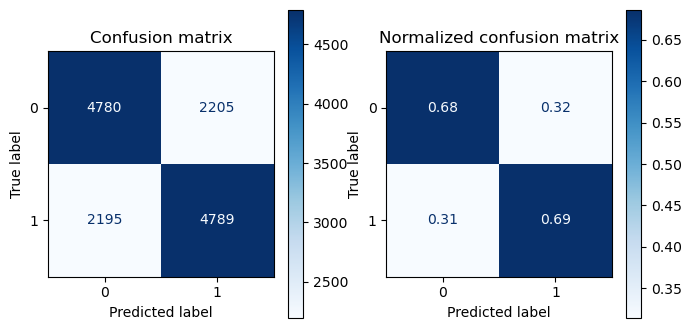

In [17]:
get_evaluation(y_test, prediction, lg, X_test)